In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-05-09 02:59:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  23.3MB/s    in 0.2s    

2020-05-09 02:59:23 (23.3 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<UNK>"
training_size = 20000

In [0]:
with open("/tmp/sarcasm.json",'r') as f:
  datastore = json.load(f)

sentences=[]
labels=[]
urls=[]

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [0]:
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words= vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [0]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding=padding_type, truncating= trunc_type)

In [0]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding=padding_type, truncating= trunc_type)

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length= max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(24, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             
])


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [12]:
import numpy as np
num_epochs= 30
history = model.fit(np.array(training_padded), 
          np.array(training_labels), 
          epochs= num_epochs,
          validation_data = (np.array(testing_padded), np.array(testing_labels)),
          verbose = 2
)

Epoch 1/30
625/625 - 6s - loss: 0.4089 - accuracy: 0.7957 - val_loss: 0.3317 - val_accuracy: 0.8550
Epoch 2/30
625/625 - 5s - loss: 0.2201 - accuracy: 0.9096 - val_loss: 0.3338 - val_accuracy: 0.8577
Epoch 3/30
625/625 - 5s - loss: 0.1416 - accuracy: 0.9462 - val_loss: 0.4160 - val_accuracy: 0.8512
Epoch 4/30
625/625 - 5s - loss: 0.0845 - accuracy: 0.9706 - val_loss: 0.4933 - val_accuracy: 0.8459
Epoch 5/30
625/625 - 6s - loss: 0.0540 - accuracy: 0.9817 - val_loss: 0.6210 - val_accuracy: 0.8416
Epoch 6/30
625/625 - 6s - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.7592 - val_accuracy: 0.8371
Epoch 7/30
625/625 - 5s - loss: 0.0233 - accuracy: 0.9920 - val_loss: 0.7884 - val_accuracy: 0.8351
Epoch 8/30
625/625 - 5s - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.9404 - val_accuracy: 0.8307
Epoch 9/30
625/625 - 5s - loss: 0.0114 - accuracy: 0.9962 - val_loss: 1.0733 - val_accuracy: 0.8299
Epoch 10/30
625/625 - 6s - loss: 0.0098 - accuracy: 0.9969 - val_loss: 1.1074 - val_accuracy: 0.8280

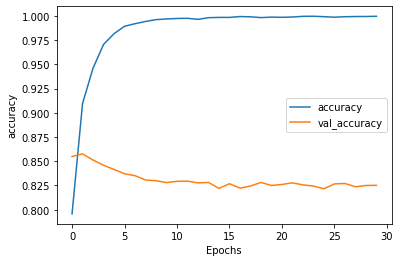

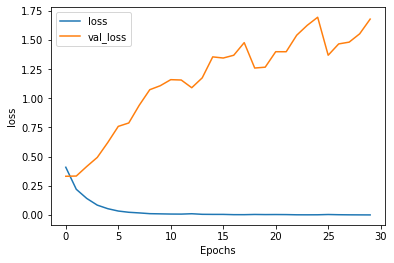

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+ string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')


In [0]:
model_conv = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length= max_length),
                             tf.keras.layers.Conv1D(128, 5, activation='relu'),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             
])

In [16]:
model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 28, 128)           10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 173,489
Trainable params: 173,489
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs= 30
history = model_conv.fit(np.array(training_padded), 
          np.array(training_labels), 
          epochs= num_epochs,
          validation_data = (np.array(testing_padded), np.array(testing_labels)),
          verbose = 2
)

Epoch 1/30
625/625 - 3s - loss: 0.4683 - accuracy: 0.7616 - val_loss: 0.3612 - val_accuracy: 0.8408
Epoch 2/30
625/625 - 3s - loss: 0.2461 - accuracy: 0.8993 - val_loss: 0.3572 - val_accuracy: 0.8451
Epoch 3/30
625/625 - 3s - loss: 0.1667 - accuracy: 0.9356 - val_loss: 0.4050 - val_accuracy: 0.8451
Epoch 4/30
625/625 - 3s - loss: 0.1133 - accuracy: 0.9599 - val_loss: 0.4716 - val_accuracy: 0.8390
Epoch 5/30
625/625 - 3s - loss: 0.0704 - accuracy: 0.9772 - val_loss: 0.6338 - val_accuracy: 0.8313
Epoch 6/30
625/625 - 3s - loss: 0.0418 - accuracy: 0.9871 - val_loss: 0.7592 - val_accuracy: 0.8302
Epoch 7/30
625/625 - 3s - loss: 0.0249 - accuracy: 0.9929 - val_loss: 0.8214 - val_accuracy: 0.8286
Epoch 8/30
625/625 - 3s - loss: 0.0136 - accuracy: 0.9970 - val_loss: 1.0371 - val_accuracy: 0.8274
Epoch 9/30
625/625 - 3s - loss: 0.0086 - accuracy: 0.9981 - val_loss: 1.0618 - val_accuracy: 0.8250
Epoch 10/30
625/625 - 3s - loss: 0.0060 - accuracy: 0.9987 - val_loss: 1.2181 - val_accuracy: 0.8250

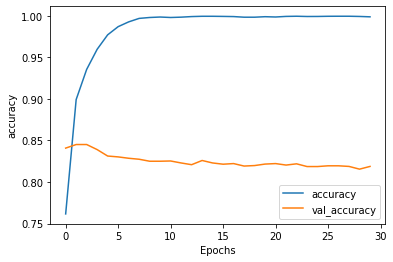

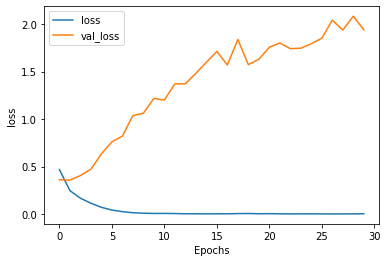

In [18]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')